In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, cohen_kappa_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import random

In [6]:
pd.read_csv('train_extracted.csv').head()

,Unnamed: 0,id_code,0,1,2,3,4,5,6,7,...,1527,1528,1529,1530,1531,1532,1533,1534,1535,diagnosis
0,0,6b91e99c9408.png,-0.235459,-0.030953,0.197894,0.901282,0.711962,0.140767,-0.025174,-0.192711,...,-0.158870,-0.226552,0.118820,-0.029197,-0.204811,-0.224724,-0.186522,0.560138,0.336024,0
1,1,29d059522fa1.png,-0.208581,-0.039379,0.696720,1.267031,0.020771,0.228147,0.008486,-0.193303,...,-0.205511,-0.217024,0.138656,0.149433,-0.203891,-0.224545,-0.234890,0.036733,-0.170579,0
2,2,5dd2e26fc244.png,-0.108935,-0.044352,-0.091808,1.831487,0.178851,0.477679,-0.065970,-0.181141,...,-0.228632,-0.193076,0.036985,-0.244723,-0.138213,-0.194106,-0.248099,-0.126982,-0.089189,4
3,3,a95d9d61ddd4.png,-0.049746,0.129871,0.731185,1.002882,0.344086,0.491387,0.107625,-0.214609,...,-0.092707,-0.231970,0.108045,0.381955,-0.185914,-0.218817,-0.240008,0.091256,-0.087205,0
4,4,c7e827fc7f41.png,-0.111866,0.283492,-0.149571,0.898684,0.415478,0.137733,-0.035991,-0.107505,...,-0.151292,-0.001490,0.434365,-0.183761,-0.159308,-0.213926,-0.081833,0.464796,-0.100383,2


In [3]:
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('train_extracted.csv')
val_data = pd.read_csv('val_extracted.csv')
test_data = pd.read_csv('test_extracted.csv')

X_train, y_train = train_data.iloc[:,2:-1], train_data.iloc[:,-1]
X_val, y_val = val_data.iloc[:,2:-1], val_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,2:-1], test_data.iloc[:,-1]

# normalizamos os dados
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2343, 1536), (2343,), (586, 1536), (586,), (733, 1536), (733,))

In [10]:
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(diagnosis
 0    1155
 2     639
 1     237
 4     189
 3     123
 Name: count, dtype: int64,
 diagnosis
 0    289
 2    160
 1     59
 4     47
 3     31
 Name: count, dtype: int64,
 diagnosis
 0    361
 2    200
 1     74
 4     59
 3     39
 Name: count, dtype: int64)

In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import SVC

SEED = 564258

f1_scorer = make_scorer(f1_score, average='weighted')

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
}

svc = SVC(class_weight='balanced', probability=True)

# cross validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3, cv=kf, scoring=f1_scorer)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.019 total time=  16.7s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.019 total time=  17.1s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.021 total time=  18.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.019 total time=  16.3s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.019 total time=  16.8s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.021 total time=  17.4s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.019 total time=  16.7s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.019 total time=  16.3s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.021 total time=  16.7s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.613 total time=  13.9s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.598 total time=  13.9s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=564258, shuffle=True),
             estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=3)

In [33]:
best_svc = grid.best_estimator_
best_svc

SVC(C=10, class_weight='balanced', gamma=0.0001, probability=True)

In [45]:
train_pred_proba = best_svc.predict_proba(X_train)
val_pred_proba = best_svc.predict_proba(X_val)
test_pred_proba = best_svc.predict_proba(X_test)
train_pred = np.argmax(train_pred_proba, axis=1)
val_pred = np.argmax(val_pred_proba, axis=1)
test_pred = np.argmax(test_pred_proba, axis=1)

print('Training F1 Score:', f1_score(y_train, train_pred, average='weighted'))
print('Validation F1 Score:', f1_score(y_val, val_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, test_pred, average='weighted'))

Training F1 Score: 0.9660693878461486
Validation F1 Score: 0.8033180169948393
Test F1 Score: 0.7821279612293104


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

def print_svc_metrics(y_true, y_pred):
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('Precision (weighted):', precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print('Recall (weighted):', recall_score(y_true, y_pred, average='weighted', zero_division=0))
    print('F1 Score (weighted):', f1_score(y_true, y_pred, average='weighted', zero_division=0))
    print('Cohen Kappa Score (quadratic):', cohen_kappa_score(y_true, y_pred, weights='quadratic'))
    for cls in range(5):
        print(f'For class {cls}:')
        print('\tPrecision:', precision_score(y_true == cls, y_pred == cls, zero_division=0))
        print('\tRecall:', recall_score(y_true == cls, y_pred == cls, zero_division=0))

print_svc_metrics(y_train, train_pred)

Accuracy: 0.9658557405036279
Precision (weighted): 0.9666154516885448
Recall (weighted): 0.9658557405036279
F1 Score (weighted): 0.9660693878461486
Cohen Kappa Score (quadratic): 0.9788554759401653
For class 0:
	Precision: 0.99128160418483
	Recall: 0.9844155844155844
For class 1:
	Precision: 0.8740157480314961
	Recall: 0.9367088607594937
For class 2:
	Precision: 0.9587955625990491
	Recall: 0.94679186228482
For class 3:
	Precision: 0.953125
	Recall: 0.991869918699187
For class 4:
	Precision: 0.9672131147540983
	Recall: 0.9365079365079365


In [47]:
print_svc_metrics(y_val, val_pred)

Accuracy: 0.8225255972696246
Precision (weighted): 0.8169721823523954
Recall (weighted): 0.8225255972696246
F1 Score (weighted): 0.8033180169948393
Cohen Kappa Score (quadratic): 0.870058037402735
For class 0:
	Precision: 0.9696969696969697
	Recall: 0.9965397923875432
For class 1:
	Precision: 0.7560975609756098
	Recall: 0.5254237288135594
For class 2:
	Precision: 0.6666666666666666
	Recall: 0.8875
For class 3:
	Precision: 0.625
	Recall: 0.16129032258064516
For class 4:
	Precision: 0.5925925925925926
	Recall: 0.3404255319148936


In [48]:
print_svc_metrics(y_test, test_pred)

Accuracy: 0.7953615279672579
Precision (weighted): 0.7906525810182797
Recall (weighted): 0.7953615279672579
F1 Score (weighted): 0.7821279612293104
Cohen Kappa Score (quadratic): 0.8469822775095599
For class 0:
	Precision: 0.953168044077135
	Recall: 0.9584487534626038
For class 1:
	Precision: 0.6041666666666666
	Recall: 0.3918918918918919
For class 2:
	Precision: 0.6528301886792452
	Recall: 0.865
For class 3:
	Precision: 0.6086956521739131
	Recall: 0.358974358974359
For class 4:
	Precision: 0.6176470588235294
	Recall: 0.3559322033898305


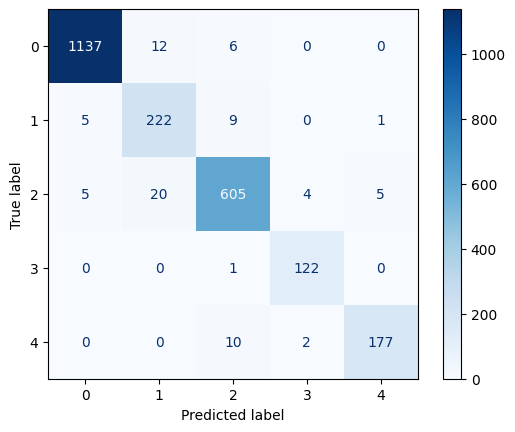

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

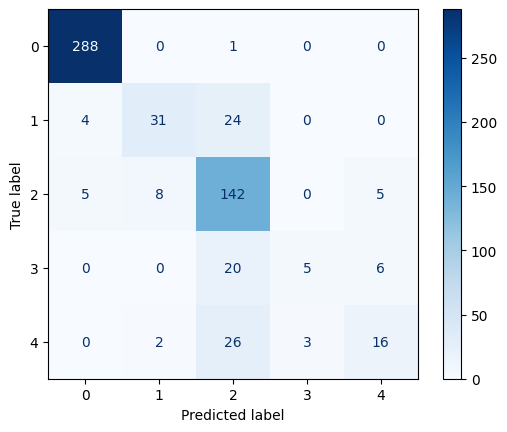

In [50]:
cm = confusion_matrix(y_val, val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

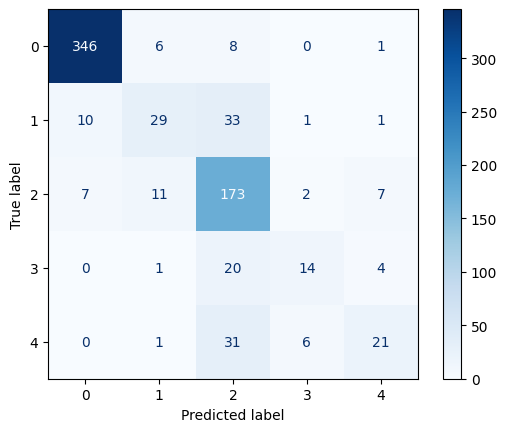

In [51]:
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

print('train AUC (ovr):', roc_auc_score(y_train, train_pred_proba, multi_class='ovr'))
print('val AUC (ovr):', roc_auc_score(y_val, val_pred_proba, multi_class='ovr'))
print('test AUC (ovr):', roc_auc_score(y_test, test_pred_proba, multi_class='ovr'))

train AUC (ovr): 0.9962682684593082
val AUC (ovr): 0.9314795656402213
test AUC (ovr): 0.9336069910900703


In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_true, y_pred_proba):
    y_true_one_hot_full = tf.keras.utils.to_categorical(y_true, num_classes=5) # Assuming 5 classes (0-4)

    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 5

    for i in range(n_classes):
        # Ensure the true labels and predictions have the same number of samples
        if len(y_true_one_hot_full[:, i]) == len(y_pred_proba[:, i]):
            fpr[i], tpr[i], _ = roc_curve(y_true_one_hot_full[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        else:
            print(f"Skipping class {i} due to mismatch in sample count.")
            roc_auc[i] = float('nan') # Set AUC to NaN if sample counts don't match


    # Plot the ROC curves
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'orange', 'purple'] # Colors for each class
    for i in range(n_classes):
        if not np.isnan(roc_auc[i]): # Only plot if AUC is not NaN
            plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                    label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
        else:
            print(f"Cannot plot ROC curve for class {i} as AUC is NaN.")


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    print("\nAUC for each class:")
    for i in range(n_classes):
        print(f"Class {i}: {roc_auc[i]:.2f}")

In [88]:
print('train AUC (ovr):', roc_auc_score(y_train, xg_train_pred_proba, multi_class='ovr'))
print('val AUC (ovr):', roc_auc_score(y_val, xg_val_pred_proba, multi_class='ovr'))
print('test AUC (ovr):', roc_auc_score(y_test, xg_test_pred_proba, multi_class='ovr'))

train AUC (ovr): 0.9998511688517195
val AUC (ovr): 0.9114780079012398
test AUC (ovr): 0.919284461504328


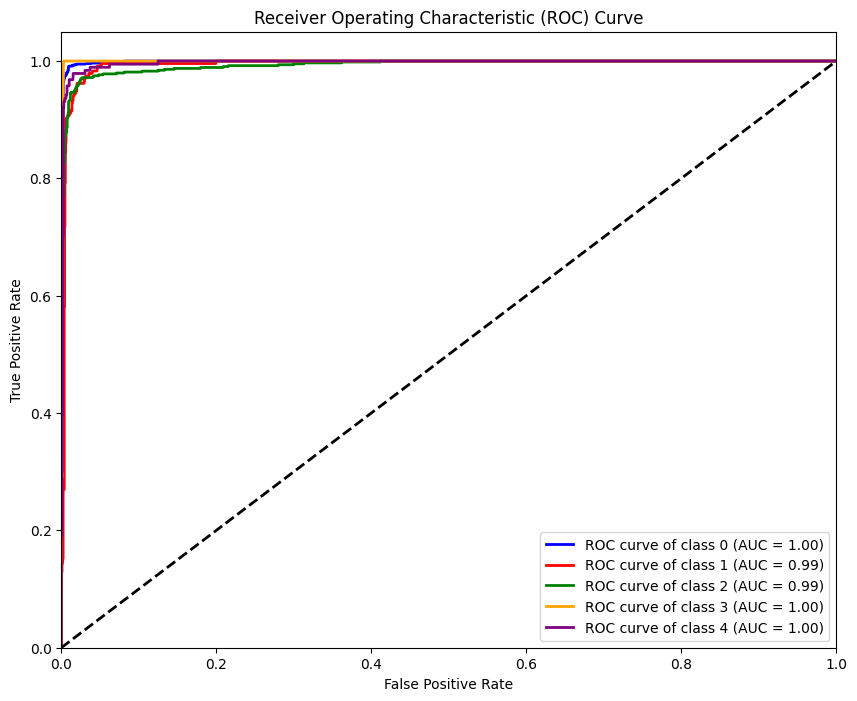


AUC for each class:
Class 0: 1.00
Class 1: 0.99
Class 2: 0.99
Class 3: 1.00
Class 4: 1.00


In [68]:
plot_roc_curve(y_train, train_pred_proba)

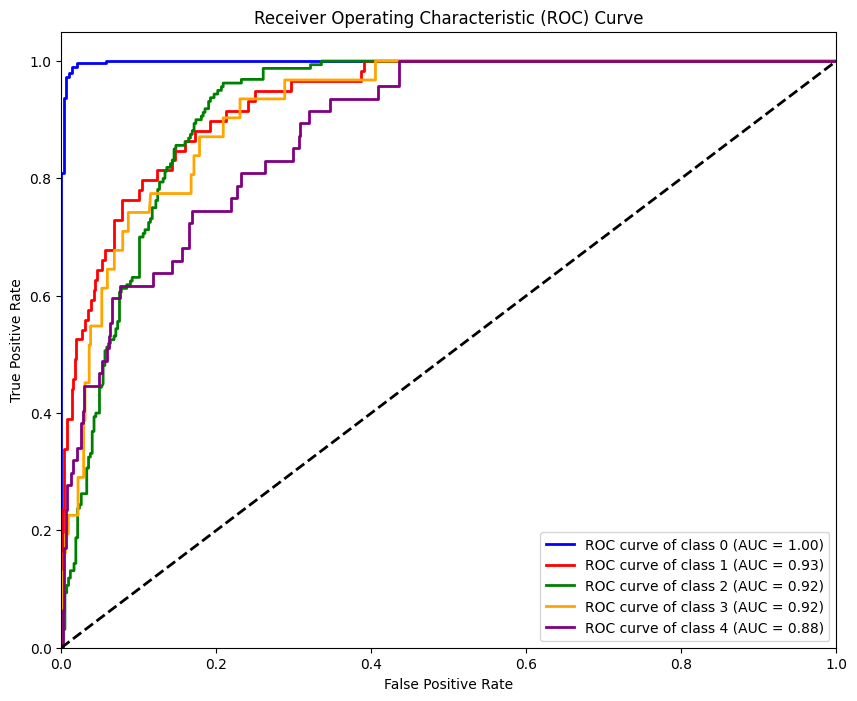


AUC for each class:
Class 0: 1.00
Class 1: 0.93
Class 2: 0.92
Class 3: 0.92
Class 4: 0.88


In [69]:
plot_roc_curve(y_val, val_pred_proba)

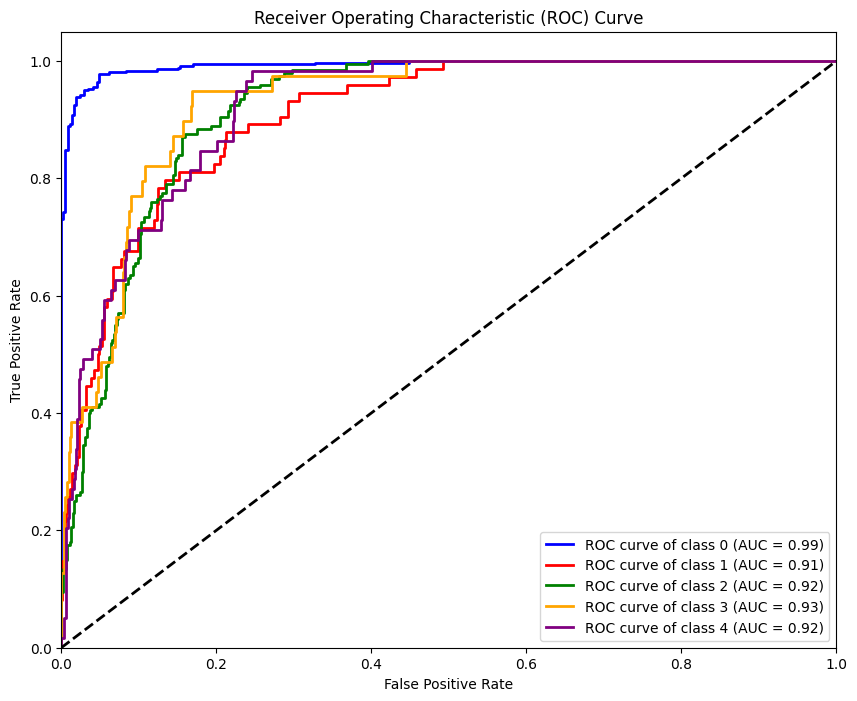


AUC for each class:
Class 0: 0.99
Class 1: 0.91
Class 2: 0.92
Class 3: 0.93
Class 4: 0.92


In [70]:
plot_roc_curve(y_test, test_pred_proba)

In [82]:
import sklearn
print(sklearn.metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1155
           1       0.87      0.94      0.90       237
           2       0.96      0.95      0.95       639
           3       0.95      0.99      0.97       123
           4       0.97      0.94      0.95       189

    accuracy                           0.97      2343
   macro avg       0.95      0.96      0.95      2343
weighted avg       0.97      0.97      0.97      2343



In [83]:
print(sklearn.metrics.classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       289
           1       0.76      0.53      0.62        59
           2       0.67      0.89      0.76       160
           3       0.62      0.16      0.26        31
           4       0.59      0.34      0.43        47

    accuracy                           0.82       586
   macro avg       0.72      0.58      0.61       586
weighted avg       0.82      0.82      0.80       586



In [84]:
print(sklearn.metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       361
           1       0.60      0.39      0.48        74
           2       0.65      0.86      0.74       200
           3       0.61      0.36      0.45        39
           4       0.62      0.36      0.45        59

    accuracy                           0.80       733
   macro avg       0.69      0.59      0.62       733
weighted avg       0.79      0.80      0.78       733



In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgboost = XGBClassifier(objective='multi:softmax', num_class=5, random_state=SEED)

x_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1], # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1] # L2 regularization
}

x_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
xgrid = RandomizedSearchCV(xgboost, x_param_grid, refit = True, verbose = 3, cv=x_kf, scoring=f1_scorer, n_iter=20, random_state=SEED) # Added n_iter for RandomizedSearchCV
xgrid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0;, score=0.755 total time=  48.5s
[CV 2/3] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0;, score=0.736 total time=  48.3s
[CV 3/3] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0;, score=0.755 total time=  48.3s
[CV 1/3] END gamma=0.3, learning_rate=0.05, max_depth=6, n_estimators=50, reg_alpha=0, reg_lambda=0.1;, score=0.757 total time= 1.4min
[CV 2/3] END gamma=0.3, learning_rate=0.05, max_depth=6, n_estimators=50, reg_alpha=0, reg_lambda=0.1;, score=0.717 total time= 1.4min
[CV 3/3] END gamma=0.3, learning_rate=0.05, max_depth=6, n_estimators=50, reg_alpha=0, reg_lambda=0.1;, score=0.734 total time= 1.4min
[CV 1/3] END gamma=0.3, learning_rate=0.1, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0;, score=0.749 total time= 2

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=564258, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=5, ...),
                   n_iter=20,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0, 0.1, 0.5, 1]},
                   random_state=564258,
                   scoring=make_scorer(f1_score, response_method='predict', average=weighted),
                   verbose=3)

In [62]:
import joblib

joblib.dump(best_svc, 'best_svc_model.joblib')
joblib.dump(xgrid.best_estimator_, 'best_xgboost_model.joblib')


['best_xgboost_model.joblib']

In [73]:
best_xgboost = xgrid.best_estimator_

xg_train_pred_proba = best_xgboost.predict_proba(X_train)
xg_val_pred_proba = best_xgboost.predict_proba(X_val)
xg_test_pred_proba = best_xgboost.predict_proba(X_test)
xg_train_pred = np.argmax(xg_train_pred_proba, axis=1)
xg_val_pred = np.argmax(xg_val_pred_proba, axis=1)
xg_test_pred = np.argmax(xg_test_pred_proba, axis=1)

print('Training F1 Score:', f1_score(y_train, xg_train_pred, average='weighted'))
print('Validation F1 Score:', f1_score(y_val, xg_val_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, xg_test_pred, average='weighted'))

Training F1 Score: 0.9892898202469326
Validation F1 Score: 0.7859393284621226
Test F1 Score: 0.7627763471941151


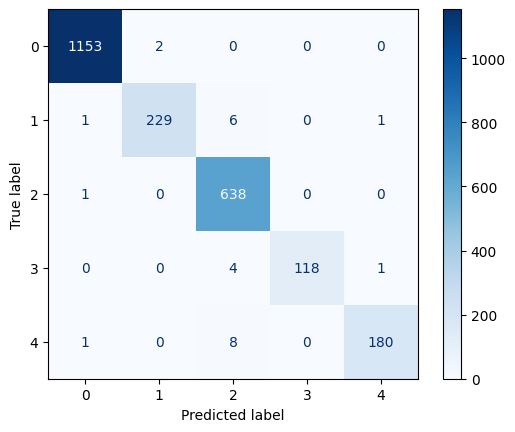

In [74]:
cm = confusion_matrix(y_train, xg_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

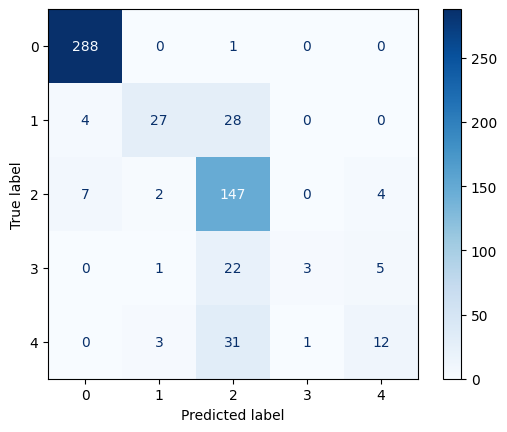

In [75]:
cm = confusion_matrix(y_val, xg_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

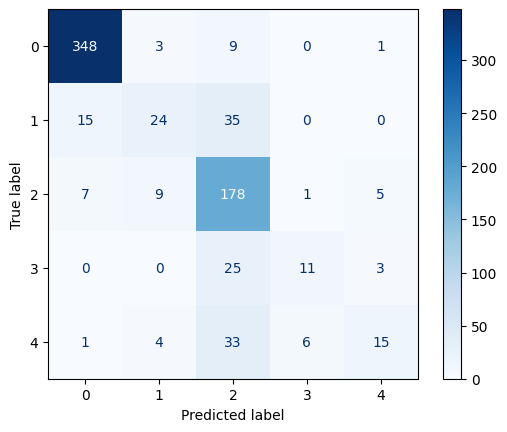

In [76]:
cm = confusion_matrix(y_test, xg_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

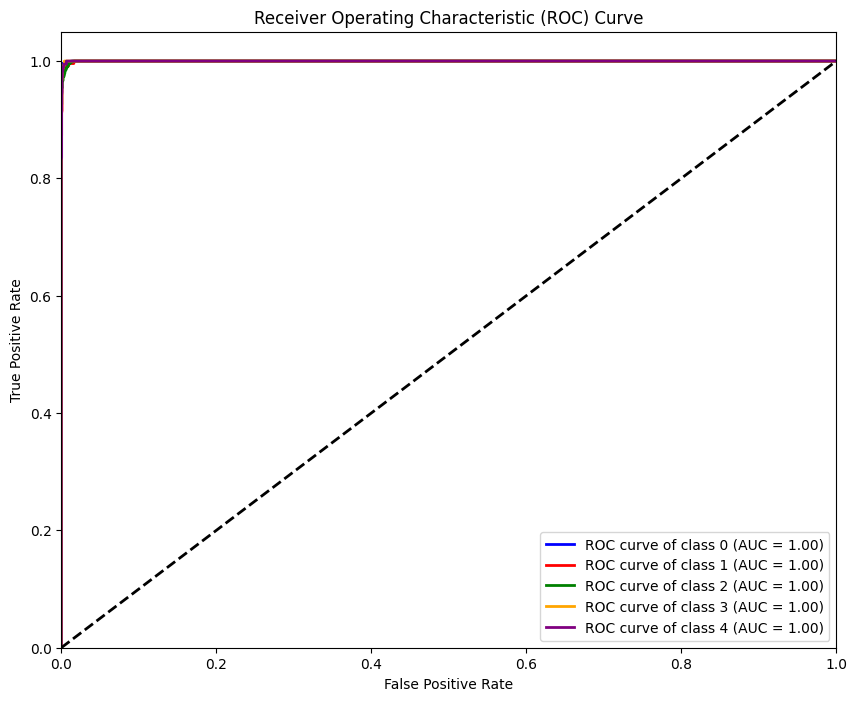


AUC for each class:
Class 0: 1.00
Class 1: 1.00
Class 2: 1.00
Class 3: 1.00
Class 4: 1.00


In [77]:
plot_roc_curve(y_train, xg_train_pred_proba)

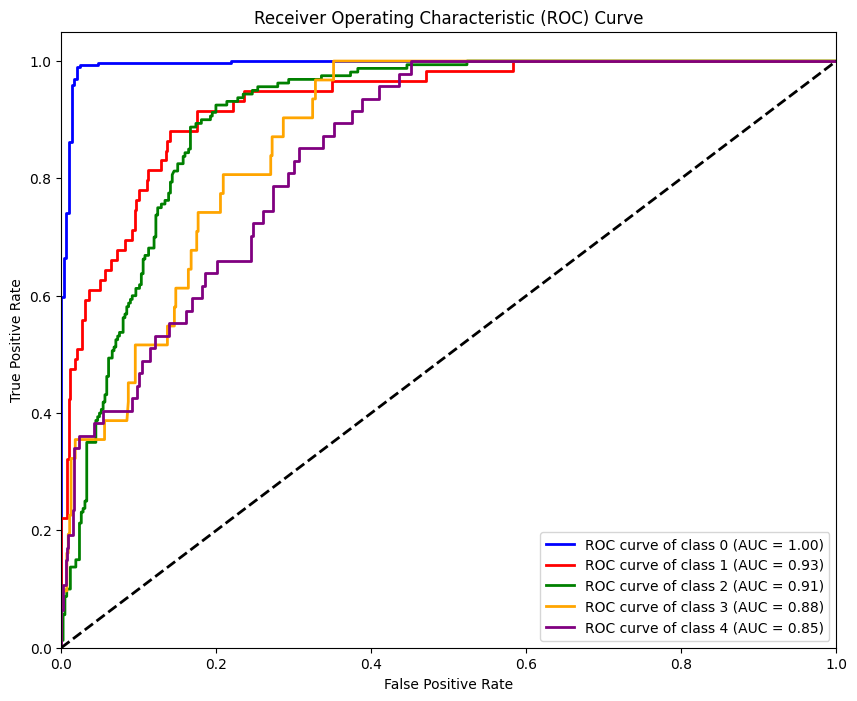


AUC for each class:
Class 0: 1.00
Class 1: 0.93
Class 2: 0.91
Class 3: 0.88
Class 4: 0.85


In [78]:
plot_roc_curve(y_val, xg_val_pred_proba)

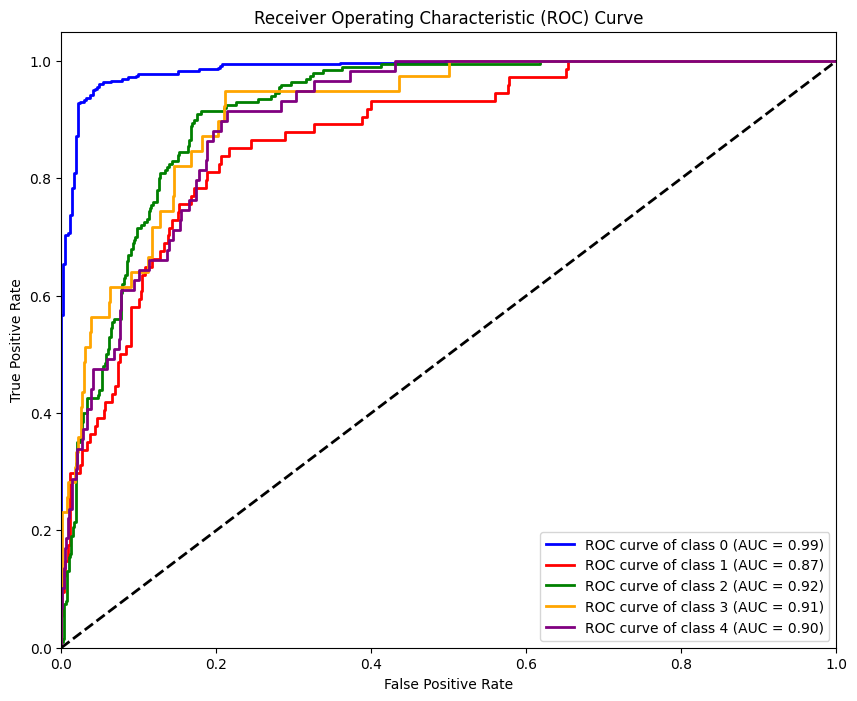


AUC for each class:
Class 0: 0.99
Class 1: 0.87
Class 2: 0.92
Class 3: 0.91
Class 4: 0.90


In [79]:
plot_roc_curve(y_test, xg_test_pred_proba)

In [85]:
print(sklearn.metrics.classification_report(y_train, xg_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       0.99      0.97      0.98       237
           2       0.97      1.00      0.99       639
           3       1.00      0.96      0.98       123
           4       0.99      0.95      0.97       189

    accuracy                           0.99      2343
   macro avg       0.99      0.97      0.98      2343
weighted avg       0.99      0.99      0.99      2343



In [86]:
print(sklearn.metrics.classification_report(y_val, xg_val_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       289
           1       0.82      0.46      0.59        59
           2       0.64      0.92      0.76       160
           3       0.75      0.10      0.17        31
           4       0.57      0.26      0.35        47

    accuracy                           0.81       586
   macro avg       0.75      0.55      0.57       586
weighted avg       0.82      0.81      0.79       586



In [87]:
print(sklearn.metrics.classification_report(y_test, xg_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       361
           1       0.60      0.32      0.42        74
           2       0.64      0.89      0.74       200
           3       0.61      0.28      0.39        39
           4       0.62      0.25      0.36        59

    accuracy                           0.79       733
   macro avg       0.68      0.54      0.57       733
weighted avg       0.78      0.79      0.76       733

